In [24]:
import os
import sys
import copy
import time
import random
from statistics import mean
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor


In [25]:

def get_plt_params():
    params = {'legend.fontsize': 'x-large',
              'figure.figsize' : (18, 8),
              'axes.labelsize' : 'x-large',
              'axes.titlesize' : 'x-large',
              'xtick.labelsize': 'x-large',
              'ytick.labelsize': 'x-large',
              'font.size'      :  10}
    return params


In [26]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
target = 'Chance of Admit'

df = pd.read_csv('csv_data/Admission_Predict_Ver1.1.csv')
df.shape

(500, 9)

In [15]:

minmax_scaler=preprocessing.MinMaxScaler()
minmax_scaler_fit=minmax_scaler.fit(df[['GRE Score','TOEFL Score','University Rating','CGPA','SOP','LOR ','Research']])
NormalizedGREScoreAndTOEFLScore=minmax_scaler_fit.transform(df[['GRE Score','TOEFL Score','University Rating','CGPA','SOP','LOR ','Research']])
data=pd.DataFrame(NormalizedGREScoreAndTOEFLScore,columns=['GRE Score','TOEFL Score','University Rating','CGPA','SOP','LOR ','Research'])
df['GRE Score']=data['GRE Score']
df['TOEFL Score']=data['TOEFL Score']

df['CGPA']=data['CGPA']
df['University Rating']=data['University Rating']
df['SOP']=data['SOP']
df['LOR ']=data['LOR ']
df['Research']=data['Research']


predictorColumns=list(df.columns)
predictorColumns.remove('Serial No.')
predictorColumns.remove('Chance of Admit')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65


In [16]:

X=df[predictorColumns].values
y=df['Chance of Admit'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)



In [27]:

#Deceision tree
model=DecisionTreeRegressor(random_state=36,max_depth=100,min_samples_leaf=10)
model.fit(X_train,y_train)
PreAdmitDT=model.predict(X_test)
AdmitData=pd.DataFrame(X_test,columns=predictorColumns)
AdmitData['ChanceOfAdmit']=y_test
AdmitData['PredictedChancesOfAdmit']=PreAdmitDT
rmseDT=np.sqrt(mean_squared_error(y_test,PreAdmitDT))
accuracyDT=r2_score(y_test,PreAdmitDT)
PreAdmitDT2=model.predict(X_train)
accuracyDT2=r2_score(y_train,PreAdmitDT2)
print("test : "+str(accuracyDT))
print("trainging : "+str(accuracyDT2))


test : 0.7998815171870798
trainging : 0.8431336860551952


In [28]:

#KNN
model=KNeighborsRegressor(n_neighbors=9,metric='euclidean')
model.fit(X_train,y_train)
PreAdmitKNN=model.predict(X_test)
AdmitData=pd.DataFrame(X_test,columns=predictorColumns)
AdmitData['ChanceOfAdmit']=y_test
AdmitData['PredictedChancesOfAdmit']=PreAdmitKNN
rmseKNN=np.sqrt(mean_squared_error(y_test,PreAdmitKNN))
accuracyKNN=r2_score(y_test,PreAdmitKNN)
PreAdmitKNN2=model.predict(X_train)
accuracyKNN2=r2_score(y_train,PreAdmitKNN2)
print("test : "+str(accuracyKNN))
print("training : "+str(accuracyKNN2))



# test_in = [[.22, .9285, .75, .875, .875, .899359,1]]
# result_knn=model.predict(test_in)
# print(result_knn*100)

test : 0.8074238782868035
training : 0.8059755315227983


In [29]:

#Nerual Network
model=MLPRegressor(hidden_layer_sizes=50,random_state=10)
model.fit(X_train,y_train)
PreAdmitNN=model.predict(X_test)
AdmitData=pd.DataFrame(X_test,columns=predictorColumns)
AdmitData['ChanceOfAdmit']=y_test
AdmitData['PredictedChancesOfAdmit']=PreAdmitNN
rmseNN=np.sqrt(mean_squared_error(y_test,PreAdmitNN))
accuracyNN=r2_score(y_test,PreAdmitNN)
PreAdmitNN2=model.predict(X_train)
accuracyNN2=r2_score(y_train,PreAdmitNN2)
print("test : "+str(accuracyNN))
print("training : "+str(accuracyNN2))



test : 0.779403235345522
training : 0.7757207208528735


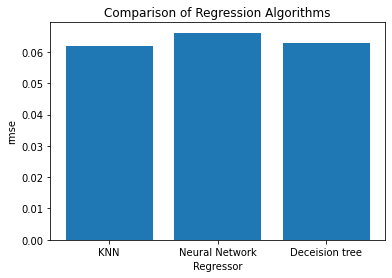

In [20]:

y = np.array([rmseKNN,rmseNN,rmseDT])
x = ["KNN","Neural Network","Deceision tree"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("rmse")
plt.show()



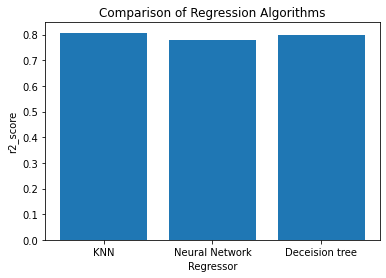

In [30]:

y = np.array([accuracyKNN,accuracyNN,accuracyDT])
x = ["KNN","Neural Network","Deceision tree"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()


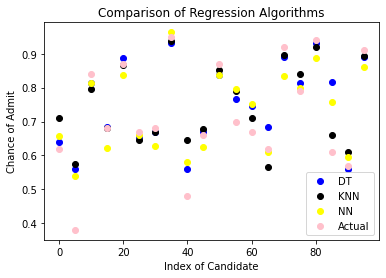

In [31]:


blue = plt.scatter(np.arange(0, 100, 5),PreAdmitDT[0:150:5],color = "blue")
black = plt.scatter(np.arange(0, 100, 5),PreAdmitKNN[0:150:5],color = "black")
yellow = plt.scatter(np.arange(0, 100, 5),PreAdmitNN[0:150:5],color = "yellow")
pink = plt.scatter(np.arange(0, 100, 5),y_test[0:150:5],color = "pink")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((blue,black,yellow,pink),( 'DT', 'KNN','NN','Actual'))
plt.show()
